<a href="https://colab.research.google.com/github/Value1965/Citilink/blob/main/%D0%A1%D0%B8%D1%82%D0%B8%D0%BB%D0%B8%D0%BD%D0%BA_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузим нужные библиотеки

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from datetime import datetime

%matplotlib inline

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/train_dataset_train.csv')#("/content/train.csv")
df_sample_solution = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/sample_solution.csv')#("/content/sample_solution.csv")

df_named = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/named.csv')#("/content/named.csv")
df_type_contract = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/type_contract.csv')#("/content/type_contract.csv")
df_log = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/log.csv')#("/content/log.csv")

## Рассмотрим датасет по ближе

In [5]:
df_train.head(3)

,contract_id,blocked
0,7780,0
1,7785,0
2,7794,0


In [6]:
df_train['blocked'].value_counts()

0    5294
1     698
Name: blocked, dtype: int64

In [7]:
df_named.head(3)

,date,url,contract_id
0,17-Apr-2021,webmail.sampo.ru,101397
1,17-Apr-2021,webmail.sampo.ru,179624
2,17-Apr-2021,tvip-provision.sampo.ru,190335


In [8]:
blocked_list=pd.merge(df_train[df_train['blocked']==1],df_named,on="contract_id",how="inner")['url'].value_counts().keys().to_list()

In [9]:
df_named.insert(3,'blocked_url',df_named['url'])
df_named['blocked_url']=df_named['blocked_url'].apply(lambda x: 1 if(x in blocked_list) else 0)

In [10]:
df_named['url'].value_counts().keys().to_list()

['camera.rt.ru',
 'vmxott.svc.iptv.rt.ru',
 'tvip-provision.sampo.ru',
 'webmail.sampo.ru',
 'statserv.sampo.ru',
 '193755.16.rt.ru',
 '_sip._udp.193755.16.rt.ru',
 '_sip._tcp.193755.16.rt.ru',
 '530237.16.rt.ru',
 '048056.16.rt.ru',
 '_sip._udp.048056.16.rt.ru',
 'st44-broadcast.sampo.ru',
 'fe-nw.svc.iptv.rt.ru',
 'navigator.sampo.ru',
 'sz-ptzv-itv02.svc.iptv.rt.ru',
 '_sip._udp.173428.16.rt.ru',
 '173428.16.rt.ru',
 'fnc.rt.ru',
 'moigorod.sampo.ru',
 '_sip._tcp.173428.16.rt.ru',
 'swap.sampo.ru',
 'acs.rt.ru',
 'sz-ptzv-itv01.svc.iptv.rt.ru',
 'sampo.ru',
 'lk.sampo.ru',
 'ohrana.sampo.ru',
 'vhod.sampo.ru',
 'sz-spbr-itv01.svc.iptv.rt.ru',
 'st46-broadcast.sampo.ru',
 'mail.sampo.ru',
 'sus.sampo.ru',
 'camera-updater.camera.rt.ru',
 'st45-broadcast.sampo.ru',
 'vitrina.sampo.ru',
 'data.sampo.ru',
 'sz-mrsk-itv01.svc.iptv.rt.ru',
 'profile.sampo.ru',
 'sz-mrsk-itv03.svc.iptv.rt.ru',
 'sz-spbr-itv05.svc.iptv.rt.ru',
 'storage44.swap.sampo.ru',
 'sz-mrsk-itv02.svc.iptv.rt.ru',
 'k

In [11]:
df_log['event_type'].value_counts()

Информер ВК. Показ                                                  8001
Включение интернета на 20 минут                                     4092
Обращение в службу заботы о клиентах                                2860
Гарантированный платеж за деньги                                    2679
Виртуальное бессмертие. Использование                                757
                                                                    ... 
Футболка Ситилинк                                                      1
Закрытие информатора об изменении уведомлений через ВК платформу       1
Окончание рассрочки за подключение                                     1
Общий счет. Отсоединение реципиента                                    1
Общий счет. Отсоединение от донора                                     1
Name: event_type, Length: 105, dtype: int64

In [12]:
blocked_log=pd.merge(df_train[df_train['blocked']==1],df_log,on="contract_id",how="inner")['event_type'].value_counts().keys().to_list()

In [13]:
blocked_log

['Информер ВК. Показ',
 'Обращение в службу заботы о клиентах',
 'Включение интернета на 20 минут',
 'Гарантированный платеж за деньги',
 'Виртуальное бессмертие. Использование',
 'Оборудование',
 'Включение интернета на 20 минут с IVR',
 'Отключение услуги Аренда ТВ-приставки',
 'Внутреннее сообщение',
 'Изменение истории',
 'Добавление в Обращались с номеров',
 'Смена пароля',
 'Смена тарифа',
 'Предложение ТВ',
 'Изменение данных клиента',
 'Состояние клиентского оборудования',
 'Перенос денежных средств',
 'Активация гарантированного платежа',
 'Операция с mac-адресом',
 'Получение подарка в ЛК: сутки интернета на максимальной скорости',
 'Просмотр раздела Тайный покупатель',
 'Получение подарка в ЛК: 1 месяц бесплатного просмотра IPTV',
 'Закрепление сообщения',
 'Активация точки подключения на сутки',
 'Смена IP-адреса',
 'Принято заявление и доп. соглашение по переезду',
 'Отключение услуги Автоплатёж',
 'Включение IPTV-пакета',
 'Предложение IPTV',
 'Предложение тарифа',
 'Реес

In [14]:
df_type_contract.head(3)

,contract_id,day_or_month_contract
0,7780,0
1,3996,0
2,7785,0


In [15]:
df_log.head(3)

,contract_id,event_date,event_type
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета


In [16]:
max_date=max(df_log['event_date'])

In [17]:
#df_log.insert(3,'howlongago',df_log['event_date'])
df_log['howlongago']=df_log['event_date'].apply(lambda x:(datetime.strptime(max_date,"%Y-%m-%d %H:%M:%S")-datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).days)              

In [18]:
df_log.head(20)
#df_log.info()

,contract_id,event_date,event_type,howlongago
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров,32
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах,32
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета,32
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета,32
4,36294,2021-03-28 16:35:04,Обращение в службу заботы о клиентах,32
5,36294,2021-03-28 16:37:26,Обращение в службу заботы о клиентах,32
6,36294,2021-04-01 18:06:15,Обращение в службу заботы о клиентах,28
7,36294,2021-04-06 17:32:09,Отключение услуги Аренда ТВ-приставки,23
8,36294,2021-04-06 17:32:10,Отключение услуги Аренда ТВ-приставки,23
9,36294,2021-04-06 17:32:13,Оборудование,23


In [19]:
df_log['event_type'].value_counts().keys().tolist()

['Информер ВК. Показ',
 'Включение интернета на 20 минут',
 'Обращение в службу заботы о клиентах',
 'Гарантированный платеж за деньги',
 'Виртуальное бессмертие. Использование',
 'Турбокнопка бесплатно',
 'Включение интернета на 20 минут с IVR',
 'Смена тарифа',
 'Состояние клиентского оборудования',
 'Смена пароля',
 'Оборудование',
 'Изменение истории',
 'Показ информатора об изменении уведомлений через ВК платформу',
 'Предложение ТВ',
 'Добавление в Обращались с номеров',
 'Внутреннее сообщение',
 'Включение IPTV-пакета',
 'Предложение тарифа',
 'Просмотр раздела Тайный покупатель',
 'Операция с mac-адресом',
 'Включение автоматической активации ГП',
 'Изменение данных клиента',
 'Реестр договоров',
 'Отключение услуги Аренда ТВ-приставки',
 'Получение подарка в ЛК: сутки интернета на максимальной скорости',
 'Получение подарка в ЛК: 1 месяц бесплатного просмотра IPTV',
 'Активация гарантированного платежа',
 'Предложение IPTV',
 'Выключение IPTV-пакета',
 'Турбокнопка платно (1 ч

In [20]:
df_named.head(30)

,date,url,contract_id,blocked_url
0,17-Apr-2021,webmail.sampo.ru,101397,1
1,17-Apr-2021,webmail.sampo.ru,179624,1
2,17-Apr-2021,tvip-provision.sampo.ru,190335,0
3,17-Apr-2021,tvip-provision.sampo.ru,61670,0
4,17-Apr-2021,tvip-provision.sampo.ru,39370,0
5,17-Apr-2021,old-statserv.sampo.ru,86324,1
6,17-Apr-2021,statserv.sampo.ru,188387,1
7,17-Apr-2021,statserv.sampo.ru,74506,1
8,17-Apr-2021,swap.sampo.ru,201689,1
9,17-Apr-2021,swap.sampo.ru,202488,1


In [21]:
#count_named=df_named.groupby('contract_id').agg({'url':'count','blocked_url':'sum'})
count_named=df_named.groupby('contract_id').agg({'blocked_url':'sum'})
#count_named=df_named.groupby('contract_id').agg({'url':'count'})

In [22]:
count_named.head(4)

,blocked_url
contract_id,
3455,22
3458,1
3459,2
3460,10


Узнаем размерность наборов

In [23]:
print("df_train", df_train.shape)
print("df_named", df_named.shape)
print("df_sample_solution", df_sample_solution.shape)
print("df_type_contract", df_type_contract.shape)
print("df_log", df_log.shape)

df_train (5992, 2)
df_named (10646537, 4)
df_sample_solution (810, 2)
df_type_contract (6805, 2)
df_log (25274, 4)


### Видоизмение данных

Обьединим два набора с данными

In [24]:
df_train = pd.merge(df_train, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")

df_train.head(3)

,contract_id,blocked,day_or_month_contract
0,7780,0,0.0
1,7785,0,0.0
2,7794,0,0.0


In [25]:
df_tvboxoff=df_log[df_log['event_type']=='Отключение услуги Аренда ТВ-приставки'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_tvboxoff.insert(1,'tvboxoff',1)
df_tvboxoff['tvboxoff']=df_tvboxoff['tvboxoff'].astype(int)

df_clientservice=df_log[df_log['event_type']=='Обращение в службу заботы о клиентах'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_clientservice.insert(1,'clientservice',1)
df_clientservice['clientservice']=df_clientservice['clientservice'].astype(int)

df_tariffchange=df_log[df_log['event_type']=='Смена тарифа'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_tariffchange.insert(1,'tariffchange',1)
df_tariffchange['tariffchange']=df_tariffchange['tariffchange'].astype(int)

df_informer=df_log[df_log['event_type']=='Информер ВК. Показ'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_informer.insert(1,'informer',1)
df_informer['informer']=df_informer['informer'].astype(int)

In [26]:
df_tvboxoff

,contract_id,tvboxoff
7,36294,1
23,40624,1
41,48875,1
82,31566,1
91,39446,1
...,...,...
6647,53264,1
6683,53380,1
6746,53614,1
6791,8190,1


Добавим столбец - колличество обращений человека

In [27]:
count_log = df_log.groupby("contract_id").agg({'event_date':'count','event_type':'count','howlongago':'min'})

count_log.head(3)

,event_date,event_type,howlongago
contract_id,,,
3453,1,1,57
3454,1,1,1
3456,4,4,39


In [28]:
df_train = pd.merge(df_train, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5990 non-null   float64
 3   event_date             3809 non-null   float64
 4   howlongago             3809 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 280.9 KB


In [30]:
df_train = pd.merge(df_train, count_named , on="contract_id", how='left')

In [31]:
df_train = pd.merge(df_train, df_tvboxoff , on="contract_id", how='left')
df_train = pd.merge(df_train, df_clientservice , on="contract_id", how='left')
df_train = pd.merge(df_train, df_tariffchange , on="contract_id", how='left')
df_train = pd.merge(df_train, df_informer , on="contract_id", how='left')

df_train['tvboxoff']=df_train['tvboxoff'].fillna(0)
df_train['tvboxoff']=df_train['tvboxoff'].astype(int)

df_train['clientservice']=df_train['clientservice'].fillna(0)
df_train['clientservice']=df_train['clientservice'].astype(int)

df_train['tariffchange']=df_train['tariffchange'].fillna(0)
df_train['tariffchange']=df_train['tariffchange'].astype(int)

df_train['informer']=df_train['informer'].fillna(0)
df_train['informer']=df_train['informer'].astype(int)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5990 non-null   float64
 3   event_date             3809 non-null   float64
 4   howlongago             3809 non-null   float64
 5   blocked_url            2915 non-null   float64
 6   tvboxoff               5992 non-null   int64  
 7   clientservice          5992 non-null   int64  
 8   tariffchange           5992 non-null   int64  
 9   informer               5992 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 514.9 KB


Заменим пропуски на нули

In [33]:
df_train = df_train.fillna(0)

In [34]:
df_train['day_or_month_contract']=df_train['day_or_month_contract'].astype(int)
df_train['event_date']=df_train['event_date'].apply(lambda x: int(x))

In [35]:
cat_cols=['day_or_month_contract','tvboxoff','clientservice','tariffchange']

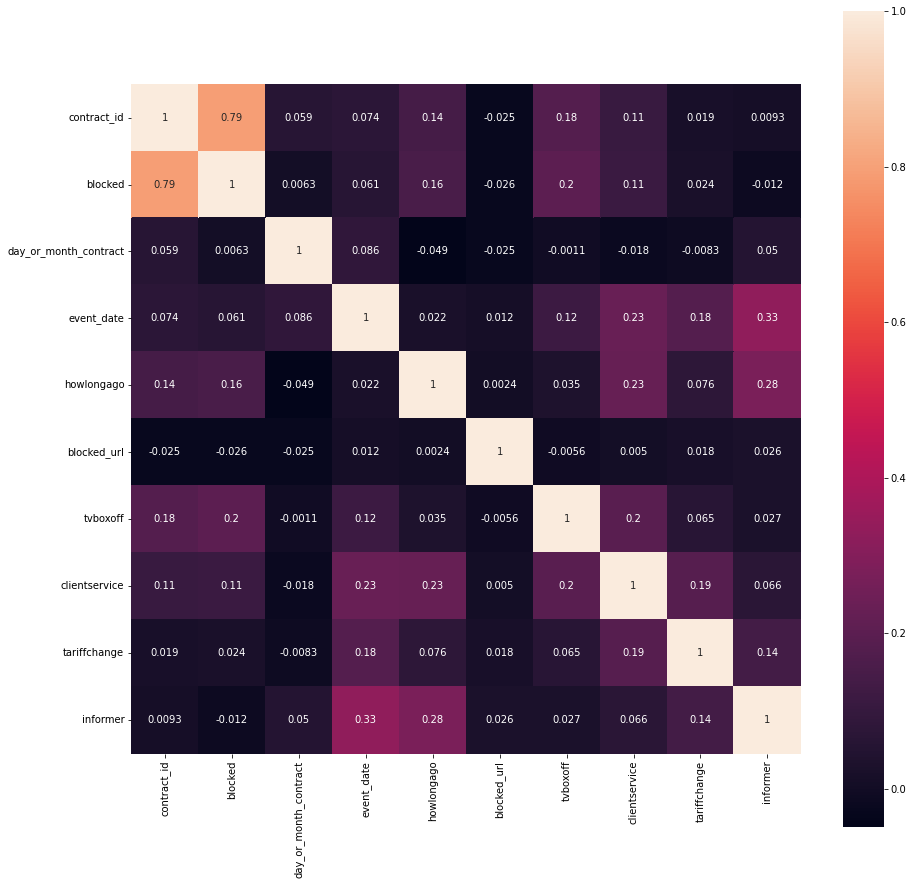

In [36]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [37]:
X = df_train.drop(["contract_id", "blocked"], axis = 1)
y = df_train[["blocked"]]

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day_or_month_contract  5992 non-null   int64  
 1   event_date             5992 non-null   int64  
 2   howlongago             5992 non-null   float64
 3   blocked_url            5992 non-null   float64
 4   tvboxoff               5992 non-null   int64  
 5   clientservice          5992 non-null   int64  
 6   tariffchange           5992 non-null   int64  
 7   informer               5992 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 421.3 KB


In [39]:
X.head()

,day_or_month_contract,event_date,howlongago,blocked_url,tvboxoff,clientservice,tariffchange,informer
0,0,9,1.0,83.0,0,1,0,0
1,0,1,30.0,10.0,0,0,0,0
2,0,0,0.0,0.0,0,0,0,0
3,1,7,36.0,0.0,0,0,0,1
4,0,3,12.0,0.0,0,0,0,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Обучение модели

In [41]:
clf = CatBoostClassifier(random_state=0,cat_features=cat_cols,auto_class_weights='Balanced',depth=6,boosting_type='Ordered')

In [42]:
clf.fit(X_train, y_train)

Learning rate set to 0.021154
0:	learn: 0.6886707	total: 57ms	remaining: 56.9s
1:	learn: 0.6841748	total: 64.6ms	remaining: 32.2s
2:	learn: 0.6800120	total: 71.5ms	remaining: 23.8s
3:	learn: 0.6761058	total: 78.8ms	remaining: 19.6s
4:	learn: 0.6732548	total: 84.4ms	remaining: 16.8s
5:	learn: 0.6702344	total: 91.8ms	remaining: 15.2s
6:	learn: 0.6667590	total: 104ms	remaining: 14.7s
7:	learn: 0.6635076	total: 112ms	remaining: 13.9s
8:	learn: 0.6598263	total: 119ms	remaining: 13.1s
9:	learn: 0.6571087	total: 125ms	remaining: 12.4s
10:	learn: 0.6542730	total: 132ms	remaining: 11.9s
11:	learn: 0.6516625	total: 140ms	remaining: 11.5s
12:	learn: 0.6491362	total: 147ms	remaining: 11.2s
13:	learn: 0.6469765	total: 160ms	remaining: 11.3s
14:	learn: 0.6449590	total: 167ms	remaining: 11s
15:	learn: 0.6428822	total: 173ms	remaining: 10.7s
16:	learn: 0.6405297	total: 181ms	remaining: 10.4s
17:	learn: 0.6380810	total: 188ms	remaining: 10.2s
18:	learn: 0.6369833	total: 200ms	remaining: 10.3s
19:	learn

## Оценка точности

In [43]:
pred = clf.predict(X_test)

In [44]:
y_test.head(3)

,blocked
2404,0
1916,0
2503,0


In [45]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_test, pred, average='macro'))

Recall score: 0.6933333333333334


In [46]:
y_test.columns.values

array(['blocked'], dtype=object)

In [47]:
#df_solution=pd.merge(df_sample_solution,df_train,on='contract_id',how='inner')
df_solution = pd.merge(df_sample_solution, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_solution = pd.merge(df_solution, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)
df_solution = pd.merge(df_solution, count_named , on="contract_id", how='left')#.drop(["date"],axis =1)
df_solution = pd.merge(df_solution, df_tvboxoff , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_clientservice , on="contract_id", how='left')#.drop_duplicates(subset="contract_id")
df_solution = pd.merge(df_solution, df_tariffchange , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_informer , on="contract_id", how='left')

df_solution['tvboxoff']=df_solution['tvboxoff'].fillna(0)
df_solution['clientservice']=df_solution['clientservice'].fillna(0)
df_solution['tariffchange']=df_solution['tariffchange'].fillna(0)
df_solution['informer']=df_solution['informer'].fillna(0)

df_solution = df_solution.drop(["contract_id", "blocked"], axis = 1)
df_solution['day_or_month_contract'] = df_solution['day_or_month_contract'].astype(int)
df_solution['tvboxoff']=df_solution['tvboxoff'].astype(int)
df_solution['clientservice']=df_solution['clientservice'].astype(int)
df_solution['tariffchange']=df_solution['tariffchange'].astype(int)
df_solution['informer']=df_solution['informer'].astype(int)
df_solution=df_solution.fillna(0)

In [48]:
df_solution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day_or_month_contract  810 non-null    int64  
 1   event_date             810 non-null    float64
 2   howlongago             810 non-null    float64
 3   blocked_url            810 non-null    float64
 4   tvboxoff               810 non-null    int64  
 5   clientservice          810 non-null    int64  
 6   tariffchange           810 non-null    int64  
 7   informer               810 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 57.0 KB


In [49]:
df_solution.fillna(0)
df_solution['event_date']=df_solution['event_date'].apply(lambda x: int(x))

In [50]:
pred = clf.predict(df_solution)

In [51]:
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [52]:
df_sample_solution['blocked']=pred

In [53]:
df_sample_solution.to_csv('solution.csv',index=None)